# PCA と t-SNE の可視化比較

In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection
%matplotlib inline

In [2]:
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target


In [3]:
xx=[]
for i in range(0,len(X)):
    xx.append((X[i] - np.min(X)) / (np.max(X) - np.min(X)))
X=xx

# PCA のモデル

TruncatedSVD を利用
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

In [4]:
# PCA のモデル
pca=decomposition.TruncatedSVD(n_components=2)
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
pca2=pca.fit(X)
pca2.components_
pca3=pca2.transform(X)


# t-SNE のモデル
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [5]:
# t-SNE のモデル
tsne = manifold.TSNE(n_components=2, init='pca',
                     random_state=0,
                     perplexity=50,
                     verbose=1,
                     n_iter=1500)
X_tsne = tsne.fit_transform(X)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.004s...
[t-SNE] Computed neighbors for 1797 samples in 0.382s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 0.821183
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.235954
[t-SNE] Error after 1500 iterations: 0.669452


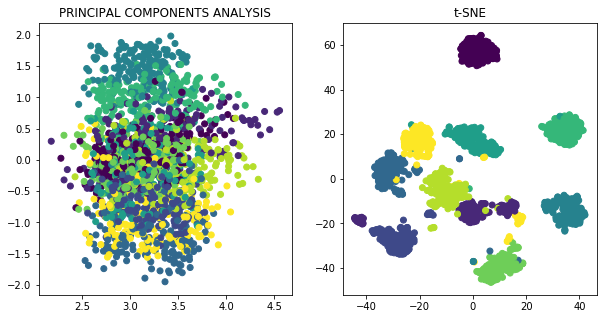

In [6]:
# 両モデルの可視化
fig = plt.figure(figsize=(10,5))
plt.subplot2grid((1,2), (0,0))
plt.title('PRINCIPAL COMPONENTS ANALYSIS')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=digits.target)
plt.subplot2grid((1,2), (0,1), rowspan=1, colspan=2)
plt.title('t-SNE')
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=digits.target)
plt.show()

In [7]:
# 次元比較
## ORIGINAL DATA DIMENSIONS
print('ORIGINAL DATA DIMENSION:',np.array(X).shape)

## DIMENSIONS AFTER t-SNE
print('DIMENSIONS AFTER t-SNE',np.array(X_tsne).shape)

ORIGINAL DATA DIMENSION: (1797, 64)
DIMENSIONS AFTER t-SNE (1797, 2)


In [8]:
# t-SNE のモデル　perplexity=20
tsne_20 = manifold.TSNE(n_components=2, init='pca',
                     random_state=0,
                     perplexity=20,
                     verbose=1,
                     n_iter=1500)
X_tsne_2 = tsne_20.fit_transform(X)

# t-SNE のモデル　perplexity=70
tsne_70 = manifold.TSNE(n_components=2, init='pca',
                     random_state=0,
                     perplexity=70,
                     verbose=1,
                     n_iter=1500)
X_tsne_3 = tsne_70.fit_transform(X)

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.004s...
[t-SNE] Computed neighbors for 1797 samples in 0.336s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 0.654405
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.614994
[t-SNE] Error after 1500 iterations: 0.787927
[t-SNE] Computing 211 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.003s...
[t-SNE] Computed neighbors for 1797 samples in 0.433s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 0.891549
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.651417
[t-SNE] Error after 1500 iterations: 0.629038


# パラメータ perplexity変動時の確認
t-SNE のモデルにおいて、perplexity=20,70,150,200 と
パラメータが変動した時の可視化状態がどう変化するのかを確認する。

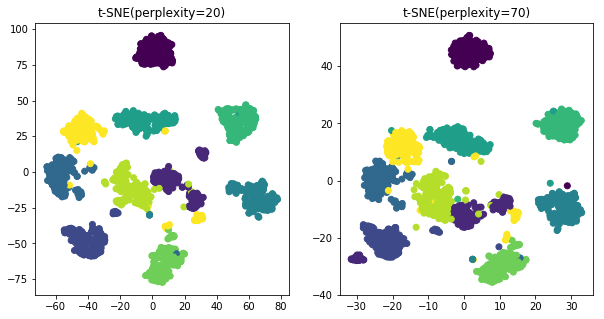

In [9]:
# t-SNE のモデル　perplexity=20,70 のパラメータ変動時の確認
fig = plt.figure(figsize=(10,5))
plt.subplot2grid((1,2), (0,0))
plt.title('t-SNE(perplexity=20)')
plt.scatter(X_tsne_2[:, 0], X_tsne_2[:, 1], c=digits.target)

plt.subplot2grid((1,2), (0,1), rowspan=1, colspan=2)
plt.title('t-SNE(perplexity=70)')
plt.scatter(X_tsne_3[:, 0], X_tsne_3[:, 1], c=digits.target)

plt.show()

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.004s...
[t-SNE] Computed neighbors for 1797 samples in 0.491s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 0.970127
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.924877
[t-SNE] Error after 1500 iterations: 0.595957
[t-SNE] Computing 451 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.003s...
[t-SNE] Computed neighbors for 1797 samples in 0.530s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 1.058297
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.636166
[t-SNE] Error after 1500 iterations: 0.555919


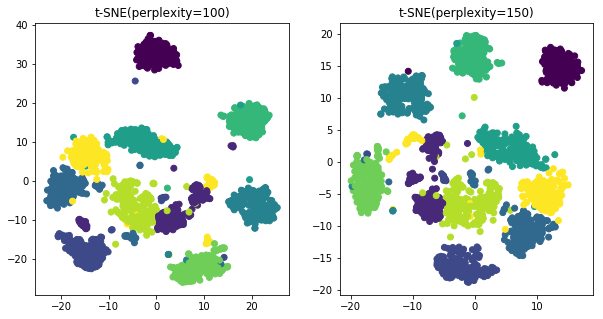

In [10]:
# t-SNE のモデル　perplexity=100
tsne_100 = manifold.TSNE(n_components=2, init='pca',
                     random_state=0,
                     perplexity=100,
                     verbose=1,
                     n_iter=1500)
X_tsne_4 = tsne_100.fit_transform(X)

# t-SNE のモデル　perplexity=150
tsne_150 = manifold.TSNE(n_components=2, init='pca',
                     random_state=0,
                     perplexity=150,
                     verbose=1,
                     n_iter=1500)
X_tsne_5 = tsne_150.fit_transform(X)

# t-SNE のモデル　perplexity=100,150 のパラメータ変動時の確認
fig = plt.figure(figsize=(10,5))
plt.subplot2grid((1,2), (0,0))
plt.title('t-SNE(perplexity=100)')
plt.scatter(X_tsne_4[:, 0], X_tsne_4[:, 1], c=digits.target)

plt.subplot2grid((1,2), (0,1), rowspan=1, colspan=2)
plt.title('t-SNE(perplexity=150)')
plt.scatter(X_tsne_5[:, 0], X_tsne_5[:, 1], c=digits.target)

plt.show()